# Movie Recommendation using Collaborative Filtering 

***
### MSDS 7331 Fall 2019 Lab 3 - - Association Rule Mining, Clustering, or Collaborative Filtering

The assignment is for building the recommender systems using movies dataset. 

**Team Members**

•	Pankaj Kumar

•	Ryan Goodwin

•	Deepti Kunupudi

**Data Source Reference**

GroupLens Research has collected and made available rating data sets from the MovieLens web site. The data sets were collected over various periods of time, depending on the size of the set. 

https://grouplens.org/datasets/movielens/ 

**Data Description**

"MovieLens Latest Datasets" is from the GroupLens Research Repository. They have large and small datasets. We are leveraging the dataset used for educational purpose. This data set contains 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. 

**Github Repository**

https://github.com/deeptink/MSDS7331_LAB3/blob/master/Team_Pankaj_Ryan_Deepti_LabIII.ipynb


**NBviewer Link**

https://nbviewer.jupyter.org/github/deeptink/MSDS7331_LAB3/blob/master/Team_Pankaj_Ryan_Deepti_LabIII.ipynb


<div class="alert alert-block alert-info">
<b>Note:</b> The following sections below follows the Rubric as per class standards. 
</div>

***
# Business Understanding 1
*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific*

A recommender system or a recommendation system, as per Wikipedia is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. Recommender systems are utilized in a variety of areas and are used as playlist generators for video and music services like Netflix, YouTube, and Spotify, product recommenders for services such as Amazon, or content recommenders for social media platforms such as Facebook and Twitter.  There are also popular recommender systems for specific topics like restaurants and online dating. Recommender systems have been developed to explore research articles and experts, collaborators, financial services, and life insurance. This notebook focuses on movie recommendations from explicit ratings. The dataset provides information of following - 

* There are a large number of users and a large number of movies.
* Users have supplied ratings on certain movies.
* The movies are different for each user, and the vast majority of users have rated only a tiny fraction of the overall movies.

Two of the most popular are collaborative filtering and content-based recommendations.

1. Collaborative Filtering: For each user, recommender systems recommend items based on how similar users liked the item.

2. Content-based Recommendations: If companies have detailed metadata about each of your items, they can recommend items with similar metadata tags.

We will be specifically focuses on collaborative filtering which is one of the basic form of a recommender system. It is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

What questions does the recommendation system answer? 

* How a given user will most likely rate specific movies they have not seen before ?
* What “new” movies a system might recommend to them ?

As a part of the process, we would do the following  - 

* Transforming and normalizing data if any
* Training model
* Evaluating model performance
* Selecting the optimal model

We will use **Surprise** package for collaborative filtering. Surprise is a Python scikit building and analyzing recommender systems that deal with explicit rating data.


**Measure the effectiveness of an algorithm**

We will measure the effectiveness of the algorithm using RMSE - Root mean squared error. Recommender System accuracy is popularly evaluated through two main measures: Root Mean Squared Error (RMSE) and Mean Absolute Error(MAE). Both are nice as they allow for easy interpretation: they’re both on the same scale as the original ratings. 

One tendency of Root Mean Squared Error is that it tends to disproportionately penalize large errors as the residual (error term) is squared. This means RMSE is more prone to being affected by outliers or bad predictions. RMSE will never be as small as MAE and RMSE does not use absolute values, which is a lot more mathematically convenient whenever calculating distance, gradient, or other metrics.

**Cross-Validation**

Building the cross validation is the toughest in recommendation system. One of the method is leave-out cross validation which takes longer time to complete than usual. Based on the best practices, we leveraged K-fold validation and using RMSE to evaluate the models. As mentioned earlier, RMSE is the most commonly used method to evaluate. We will measure per user and per movie rmse to check the quality of the model at detaul level. In addition, We leveraged GridSearchCV function which is used to determine the best performing parameter values using cross validation.



In [14]:
from IPython.display import Image
Image(url ='./images/t1.JPG')

***
# Data Understanding 1
*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?*

<div class="alert alert-block alert-warning">
<b>Note:</b> The below sections are subsections within Data Understanding Part 1 to visualize the segments more clearly.
</div>

As an initial step before we jump on building the recommendation system, we need to explore the data to ensure data intergity and completeness.

#### Models

We will be exploring the following models to build the recommendation system and pick the optimal model. All these models are part of Surprise package.
 * Basic Kmean Model
 * KNN with means
 * KNN Baseline
 
#### Data Preparation, Feature Engineering and Standardization

Importing the required libraries for buidling recommendation system. Along with we will evaluate and make additional modifications based on the need. The initial steps for data preparation are:
* Reading the datasets
* Merging the datasets movies, ratings, links and tags
* Verifying the datatypes of the attributes in the dataset
* Verify the data quality of the dataset which includes missing values, any duplicate data and outliers.

For data exploration and modelling, we will require the following libraries. As an initial step, we will import the required packages/libraries.

We will use **Surprise** package for collaborative filtering. Surprise is a Python scikit building and analyzing recommender systems that deal with explicit rating data.

In [2]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import GridSearchCV

#### <font color='#00008B'>Meaning and Data Type</font>

We have 4 files - Movies, Ratings, Links and Tags. Each of the file have details 

* **Movies.csv** has information for MovieID, Title and Genres.
* **Ratings.csv** has information for UserID, MovieID, Rating and Timestamp.
* **Links.csv** has information for MovieID, ImdbID, TmbdID.
* **Tags.csv** has information for UserID, MovieID, Tag and Timestamp.



In [3]:
#Reading files
movies_df =pd.read_csv('data/ml-latest-small/movies.csv')
ratings_df =pd.read_csv('data/ml-latest-small/ratings.csv')
links_df =pd.read_csv('data/ml-latest-small/links.csv')
tags_df =pd.read_csv('data/ml-latest-small/tags.csv')

**Movies**

In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Ratings**

In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Links**

In [8]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**Tags**

In [9]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Additional Column -

* Reading the data from **movies_df** and extracting year and creating a new column *Year*.
* Verifying the data after creating new column.

In [4]:
movies_df['year'] =movies_df.title.apply(lambda x: x [-5:-1] if  x[-5].strip() in ['1','2'] else None)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


Merging the dataset for movies and ratings -

* Merging the dataset with ratings_df and using that consolidated dataset for Collaborative filtering. For our lab-3, we will using ratings to answer the questions below - 

    + How a given user will most likely rate specific movies they have not seen before ?

    + What “new” movies a system might recommend to them ?

In [5]:
movie_rat_df = ratings_df.merge(movies_df)
movie_rat_df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


**Merged Dataset - Data Meaning**

The final dataset has 100,836 records and 7 attributes.

In [15]:
movie_rat_df.shape

(100836, 7)

Below shows the details about the dataset and its datatype - 

In [16]:
movie_rat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
title        100836 non-null object
genres       100836 non-null object
year         100806 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 6.2+ MB


Below statistics provide simple statistics on the dataset. We see that for rating the values range from 0.5 to 5 in intervals of 0.5. The below are the summary statistics for non-categorical values.

In [17]:
movie_rat_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### <font color='#00008B'>Data Quality</font>

Lets check the quality of data 
* Missing values
* Duplicates
* Outliers

#### <font color='#00008B'>Missing Values</font>

We dont see any null values in the dataset, however we see that we have 30 values missing in year. Since it is a calculated column and of less significant, we can ignore it for this analysis.

In [18]:
movie_rat_df.isnull().sum()

userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
year         30
dtype: int64

In [19]:
movie_rat_df.isnull().values.any()

True

#### <font color='#00008B'>Duplicate Data</font>

We do not see any duplicate data in the dataset based on the output below.

In [20]:
movie_rat_df.duplicated().sum()

0

#### <font color='#00008B'>Outliers</font>

We do have outliers in the rating data based on the visualization below. We see that we have 2 outliers in the dataset. Also we see that rating 4 has more data then any other rating values. On combined the values less than rating 3 are less rated in compared to the greater than 3.


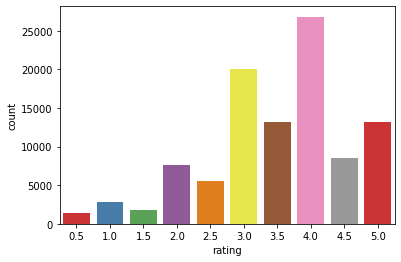

In [21]:
sns.countplot(x="rating", data=movie_rat_df, palette="Set1")

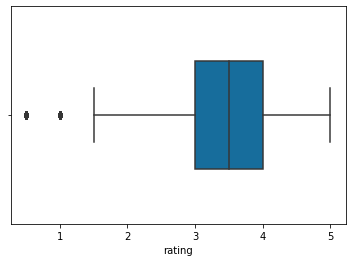

In [22]:
sns.boxplot(x='rating', 
                 data=movie_rat_df, 
                 width=0.5,
                 palette="colorblind")

#### <font color='#00008B'>Issues and Resolutions</font>

For the given dataset, 
+ we are not going to remove any outliers
+ We dont see any null values in the dataset, however we see that we have 30 values missing in year. Since it is a calculated column and of less significant, we can ignore it for this analysis.

We will continue to evaluate the dataset described above from movielens without any chnages.

***
# Data Understanding 2
*Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.*

The following are the important attributes for collaborative filtering. 
+ Movie most rated by Title
+ Movie most rated by Genre

**Movie most rated by Title**

We want to do this analysis across all the dataset to later check our recommendation result. We want to check against the criteria that movies are recommended based on user prefrerence and not only because of the prevalance of that that movie in dataset. The most important attribute is movie title and rating associated with it. It is critical to see what movies are rated the highest. We see that Shawshank Redemption, The(1994) hs most rated.

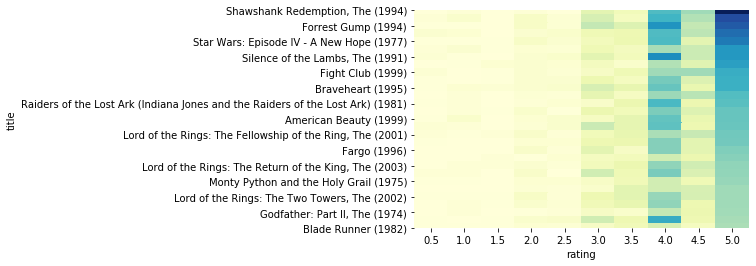

In [69]:
sns.heatmap(pd.crosstab(movie_rat_df.title, movie_rat_df.rating).sort_values(5.0, ascending= False).head(30), 
            cmap="YlGnBu", cbar=False)

**Movie most rated by Genre**

Next is reviewing the rating based on genres. This provides on insight on which generes the user likes and which he preferes based on the rating. We see that comedy and drama are most rated by user. Also, we see the least rated movie is Adventure|Fantasy.

In [24]:
pd.crosstab(movie_rat_df.genres, movie_rat_df.rating).sort_values(5.0, ascending= False).head(20)


rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
genres,,,,,,,,,,
Drama,44,99,49,287,295,1144,830,2055,593,895
Comedy,136,348,256,828,515,1614,854,1586,403,656
Crime|Drama,7,19,16,66,55,261,258,739,336,558
Drama|Romance,26,73,36,144,104,514,374,853,257,457
Action|Adventure|Sci-Fi,27,60,47,190,114,453,296,597,190,387
Comedy|Romance,66,126,93,338,304,953,513,978,221,375
Comedy|Drama|Romance,36,53,42,210,165,572,433,865,253,371
Comedy|Drama,20,68,43,209,161,585,369,851,222,323
Action|Drama|War,9,12,7,37,24,138,120,307,117,263


In [12]:
from IPython.display import Image
Image(url ='./images/gen.png')

Lets visualize the data using heatmap and Drama is most rated genre and next is comedy.

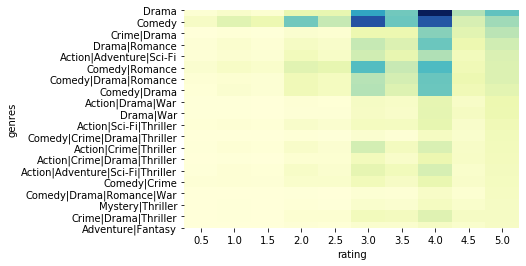

In [25]:
sns.heatmap(pd.crosstab(movie_rat_df.genres, movie_rat_df.rating).sort_values(5.0, ascending= False).head(20), 
            cmap="YlGnBu", cbar=False)

***
# Modeling and Evaluation 1
*Train and adjust parameters*

**Prepare Data for modeling**

One of the purpose of recommendation system is to predict ratings by user to those items that are not rated by those users already. 

+ Surprise module provides ways to create antiset of the dataset. This set contains all those entries of ites for users which the user has not rated. 
+ We'll use this antiset to predict ratings values using our model for the user/item pairs that don't appear in original dataset.
+ Reload Data with 1-5 Rating Scale into reader variable.
+ We are reading the data and using user id, movie id and rating as the key columns for our data.
+ Next is to create an antiset where we are building it with entries of movies which the user has not rated.

In [6]:
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
anti_set = data.build_full_trainset().build_anti_testset()

### <font color='#00008B'>Item-Item Recommendation Systems</font>

**1. Analysis with KNNBasic model**

KNNBasic algorithm uses directly derived from a basic nearest neighbors approach. It is a basic collaborative filtering algorithm.

+ We divided it into 3 folds. Then we will train our data 3 times each time on 2 different folds and we report the results on the 1st fold. The final score of our model will be the average of the 3 folds results. The folding of data is done using the split function as follows.
+ We will split the dataset into 3-fold and run KNNBasic algorithm. Since it is resource intensive, we are using 3-fold instead of 5-fold. 
+ We will evaluate the model using Root mean squared error. 
+ Based on the similarity matrix, we see that RMSE is around 0.9539 and the best provided at around 0.9622.
+ The baseline recommender system has a Root Mean Squared Error (RMSE) value of 0.9622. The meaning of this value is that the recommender system is able to predict the rating of a given movie within approximately 0.96 stars of the actual rating. 


In [27]:
kf = KFold(n_splits=3)
algo = KNNBasic()
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9539
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9622
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9539


Lets make predictions on antiset based on above model and check the RMSE. 
+ Antiset is where the ratings are not provided by the users. 
+ Running the model on these dataset shows the rating prediction or what similar users may like.


In [28]:
predictions = algo.test(anti_set)
accuracy.rmse(predictions, verbose=True)

RMSE: 0.8189


0.8188612971088003

+ RMSE is around 0.81 which is a good measure of predicting what similar user likes. 
+ Now Merging the predictions with detailed movie dataset.
+ From the heatmap we see that the based on the similarity, the movies are rated.

In [29]:
pred_df = pd.DataFrame(predictions)
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)

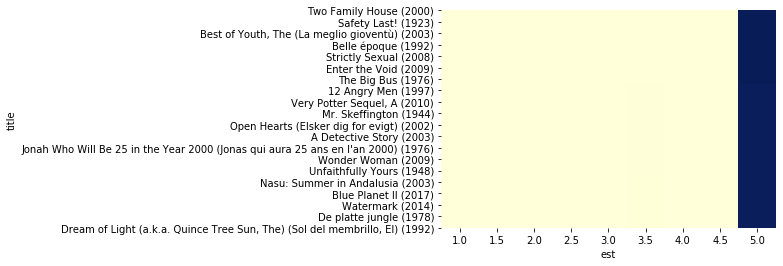

In [30]:
user_pred_df = pd.crosstab(m_df.year, m_df.est)
user_pred_df.sort_values(1.0, ascending = False).head()
sns.heatmap( user_pred_df.loc['1990':],  cbar=False)
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

**2. Analysis with KNNWithMeans**

One of the problems with basic knn is that it treats missing ratings as negative rating for that movie if rating scale starts from a value greater than and we are imputing missing values with zero. What we do in this case is to subtract raw mean for user in user item matrix to normalize the data.

KNN with means is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

+ We divided it into 3 folds. Then we will train our data 3 times each time on 2 different folds and we report the results on the 1st fold. The final score of our model will be the average of the 3 folds results. The folding of data is done using the split function as follows.
+ We will split the dataset into 3-fold and run KNNWithMeans algorithm. Since it is resource intensive, we are using 3-fold instead of 5-fold. 
+ We will evaluate the model using Root mean squared error. 
+ The baseline recommender system has a Root Mean Squared Error (RMSE) value of 0.7948. The meaning of this value is that the recommender system is able to predict the rating of a given movie within approximately 0.80 stars of the actual rating. 
+ Also, we see that we have RMSE of 0.9096, which indicated that we are able to predict the rating of a given movie within approximately 0.91 stars of the actual rating, which is the best one.
+ From the heatmap we see that the based on the similarity, the movies are rated.

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9027
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9064
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9096
RMSE: 0.7948


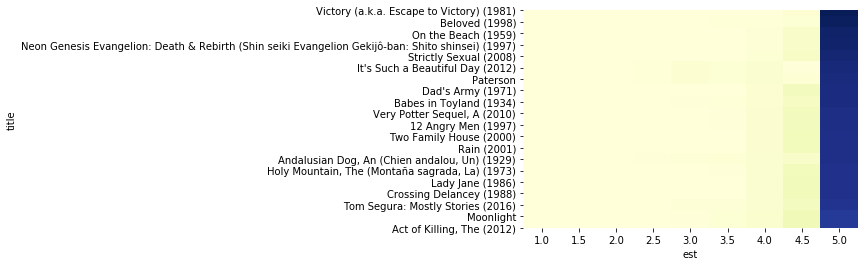

In [31]:
kf = KFold(n_splits=3)
algo = KNNWithMeans()
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
predictions = algo.test(anti_set)
accuracy.rmse(predictions, verbose=True)
pred_df = pd.DataFrame(predictions)
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)
user_pred_df = pd.crosstab(m_df.year, m_df.est)
user_pred_df.sort_values(1.0, ascending = False).head()
sns.heatmap( user_pred_df.loc['1990':],  cbar=False)
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

**3. Analysis with KNNBaseline**

KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.
In other words, KNN with baseline is used to handle the scenario where a new movie is added which is not rated yet. or when a new user is added who has not rated any movie. We use some baseline ratings in such cases.

Similar to other KNNBasic and KNNwithMeans, we will do similar steps -
+ We will split the dataset into 3-fold and run KNNBaseline algorithm. Since it is resource intensive, we are using 3-fold instead of 5-fold. 
+ We will evaluate the model using Root mean squared error. 
+ The baseline recommender system has a Root Mean Squared Error (RMSE) value of 0.7704. The meaning of this value is that the recommender system is able to predict the rating of a given movie within approximately 0.77 stars of the actual rating. 
+ Also, we see that we have RMSE of 0.8884, which indicated that we are able to predict the rating of a given movie within approximately 0.89 stars of the actual rating.
+ From the heatmap we see that the based on the similarity, the movies are rated. 
+ In each of the case, the ratings are different from other algorithms used. In this case we see that "The big bus" are rated.

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8884
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8809
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8793
RMSE: 0.7704


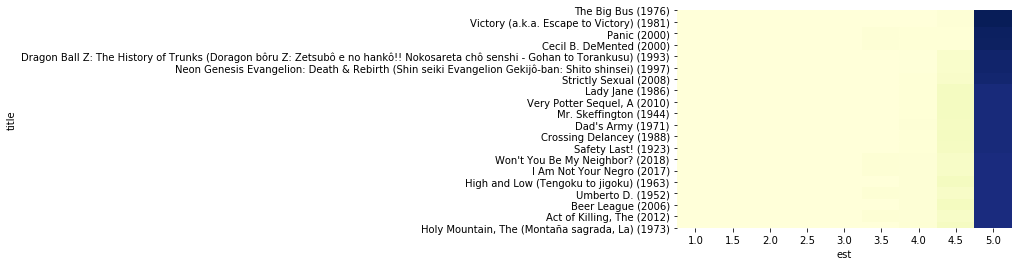

In [32]:
kf = KFold(n_splits=3)
algo = KNNBaseline()
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
predictions = algo.test(anti_set)
accuracy.rmse(predictions, verbose=True)
pred_df = pd.DataFrame(predictions)
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)
user_pred_df.sort_values(1.0, ascending = False).head()
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

The following are the ratings for rating 4. For example "Confessions of a dangerous mind" and "Emma" are rated as 4.

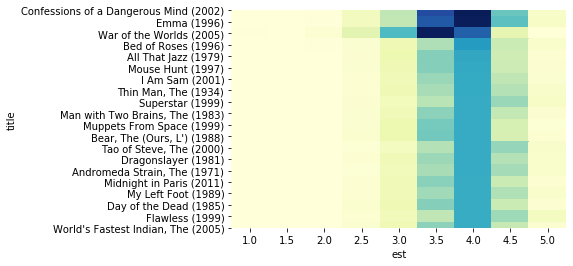

In [71]:
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(4.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

**GridSearchCV**

The models generated are based on the models without parameter search. 

The GridSearchCV class computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. 
+ This is useful for finding the best set of parameters for a prediction algorithm. 
+ It is analogous to GridSearchCV from scikit-learn.

Lets check the gridsearch for better parameters for KNNBasic.

**1. GridSearchCV for KNNBasic**

The output from below indicates that the best model with parameters would be *0.9552623123547993
{'k': 40, 'min_k': 5}
{'rmse': <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001FA916BD2B0>, 'mae': <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001FB01E8F080>}*



In [47]:
param_grid = {'k': [40, 100], 'min_k': [5, 10],}
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

be = gs.best_estimator

print(be)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
0.9552623123547993
{'k': 40, 'min_k': 5}
{'rmse': <surprise.prediction_algorithms.knns.KNNBasic object at 0x000001FA916BD2B0

In [48]:
print(gs.best_params['mae'])

{'k': 40, 'min_k': 5}


In [73]:
print(gs.best_params['rmse'])

{'k': 40, 'min_k': 5}


In [49]:
param_grid = {'k': [40, 100], 'min_k': [5, 10],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False, True]}}
gs_basic = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
gs_basic.fit(data)
# best RMSE score
print(gs_basic.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_basic.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done c

In [50]:
gs.best_params['mae']

{'k': 40, 'min_k': 5}

Above results for RMSE and MAE, suggests that using an accuracy measure as key, getting the parameters combination that gave the best accuracy results for the chosen measure (on average) is k=40 and min_k=5.
The results below show that RMSE came around 0.9076, indicating that we are able to predict the rating of a given movie within approximately 0.91 stars of the actual rating.

In [76]:
kf = KFold(n_splits=3)
algo = KNNBasic(k=40, min_k=5, sim_options= {'name': 'msd', 'min_support': 1, 'user_based': False}, verbose=True)
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9166
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9204
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9076


**2. GridSearchCV for KNNWithMeans**

The output from below indicates that the best model with parameters would be 0.8873064389183749
{'k': 100, 'min_k': 5, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}

In [51]:
param_grid = {'k': [40, 70, 100], 'min_k': [5, 10],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False, True]}}
gs_means = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5)
gs_means.fit(data)
print(gs_means.best_score['rmse'])
print(gs_means.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Rerunning the algorithm using the best optimized parameters we see that the results for RMSE and MAE, suggests that using an accuracy measure as key, getting the parameters combination that gave the best accuracy results for the chosen measure (on average) is k=100 and min_k=5. The results below show that RMSE came around 0.8860, indicating that we are able to predict the rating of a given movie within approximately 0.89 stars of the actual rating, which is the best one.

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8991
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8947
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8929
RMSE: 0.8860


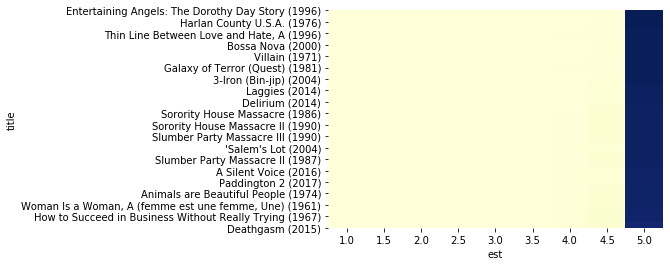

In [8]:
kf = KFold(n_splits=3)
algo = KNNWithMeans(k=100, min_k=5, sim_options={'name': 'msd', 'min_support': 1, 'user_based': False})
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
predictions = algo.test(anti_set)
accuracy.rmse(predictions, verbose=True)
pred_df = pd.DataFrame(predictions)
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)
user_pred_df = pd.crosstab(m_df.year, m_df.est)
user_pred_df.sort_values(1.0, ascending = False).head()
sns.heatmap( user_pred_df.loc['1990':],  cbar=False)
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

**3. GridSearchCV for KNNBaseline**

The output from below indicates that the best model with parameters would be 0.8576444029501975
{'k': 70, 'min_k': 10, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}, 'bsl_options': {'method': 'als', 'reg': 1}}

In [56]:
param_grid = {'k': [10,20,70], 'min_k': [1,5,10],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False, True]},
             'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]}} 
'bls'
gs_baseline = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=5)
gs_baseline.fit(data)
print(gs_baseline.best_score['rmse'])
print(gs_baseline.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [54]:
#param_grid = {'k': [40, 70, 100], 'min_k': [5, 10],
param_grid = {'k': [40], 'min_k': [5],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False, True]},
             'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]}} 
'bls'
gs_baseline = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=5)
gs_baseline.fit(data)
print(gs_baseline.best_score['rmse'])
print(gs_baseline.best_params['rmse'])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8560
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8698
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8652
RMSE: 0.3942


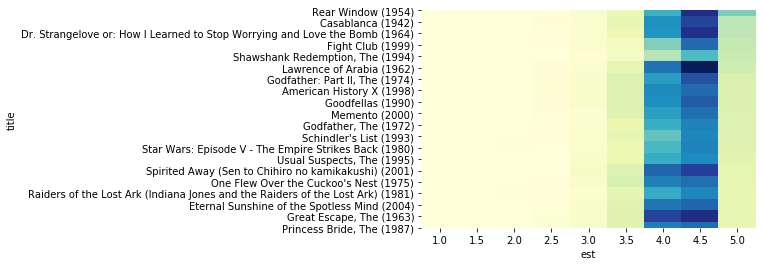

In [9]:
#{'k': 70, 'min_k': 10, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}, 'bsl_options': {'method': 'als', 'reg': 1}}
kf = KFold(n_splits=3)
algo = KNNBaseline(k=70, min_k=10, sim_options={'name': 'msd', 'min_support': 5, 'user_based': False},bsl_options={'method': 'als', 'reg': 1})
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
predictions = algo.test(anti_set)
accuracy.rmse(predictions, verbose=True)
pred_df = pd.DataFrame(predictions)
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)
user_pred_df.sort_values(1.0, ascending = False).head()
sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

Rerunning the algorithm using the best optimized parameters we see that the results for RMSE and MAE, suggests that using an accuracy measure as key, getting the parameters combination that gave the best accuracy results for the chosen measure (on average) is k=70 and min_k=10. The results below show that RMSE came around 0.8652, indicating that we are able to predict the rating of a given movie within approximately 0.87 stars of the actual rating, which is the best one.

+ We see most of the models performed better.

***
# Modeling and Evaluation 2
*Evaluate and Compare*

### <font color='#00008B'>User-Based Collaborative Filtering</font>

In this section we will evaluate the model and compare the results from above section. In the above section, we used Item-Item based collaborative modeling. In this section, we will look at user-based recommendation system and comapre the results between them. User-Based Collaborative Filtering which is a memory-based method. The main idea behind is that people with similar characteristics share similar taste. For example, if you are interested in recommending a movie to our friend Rob, suppose Rob and I have seen many movies together and we rated them almost identically. Lets implement and compare the results.

The method identifies users that are similar to the queried user and estimate the desired rating to be the weighted average of the ratings of these similar users.

As we see below, we use cosine type and user_based parameter is set to true.  The rmse and heatmap shows that how the rating is and we see that the based on the paramters given, the RMSE is ok when compared to item-based. It is around 0.90. The heatmap shows that drama and comedy are heavily rated. We have used min_k=5 and user-based predictions we are usinf KNNWithmeans.

After reviewing the results, we see that how for user-1, the rating is predicted. 

In comparision, item - item based CF  model is better at correctly recommending movies effectively but not as good as correctly predicting the exact rating the user will rate the particular movie.The item-item model is the better model as we value the ability to recommend a movie that the user than trying to predict what the rating is the user will gievn movie.

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9011
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9024
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9030
RMSE: 0.5378


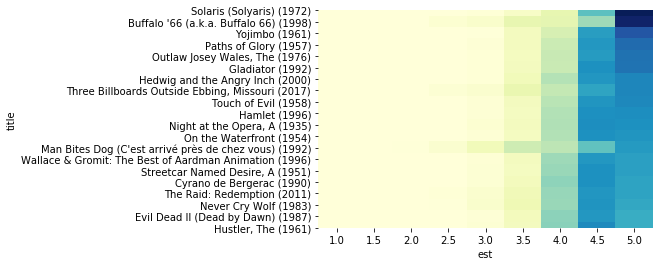

In [44]:
sim_options = {'name': 'cosine',
               'user_based': True}
bsl_options = {}

algo = KNNWithMeans(min_k =5,sim_options = sim_options, bsl_options= bsl_options)
for trainset, testset in kf.split(data):
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
predictions = algo.test(anti_set)
accuracy.rmse(predictions, verbose=True)
pred_df = pd.DataFrame(predictions)
m_df = movies_df.merge(pred_df, left_on = 'movieId', right_on = 'iid')
m_df['est'] =m_df.est.apply(lambda x: (round(x*2))/2)

sns.heatmap( pd.crosstab(m_df.title, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

The heatmap belows shows that drama and comedy are highly rated when compared to others.

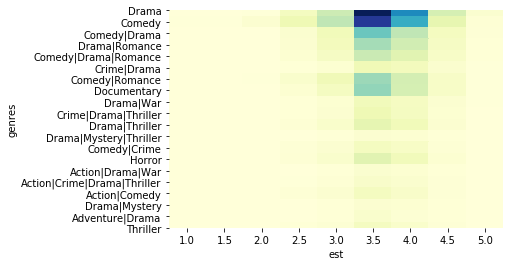

In [45]:
sns.heatmap( pd.crosstab(m_df.genres, m_df.est).sort_values(5.0, ascending = False).head(20),
            cmap="YlGnBu", cbar=False)

The below heatmap shows the how the rating is based on the year for a user. We see that the rating is around 3.5

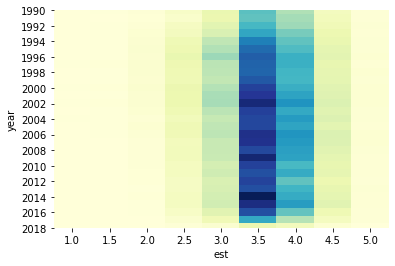

In [46]:
user_pred_df = pd.crosstab(m_df.year, m_df.est)
user_pred_df.sort_values(1.0, ascending = False).head()
sns.heatmap( user_pred_df.loc['1990':],   cmap="YlGnBu", cbar=False)

**Deciding best estimator from 3 algorithms**

Based on the item-based recommendation and with best RMSE and the ratings are predicted. A model that minimizes both biases and variance is ideal. However, in a real-world setting, we often have to make compromises. Based on each company or media centric goals, the solution can be different.


In [57]:
best_score = gs_basic.best_score['rmse']
best_gs = gs_basic
for al in [gs_baseline, gs_means]:
    if al.best_score['rmse'] > best_score:
        best_gs = al
        best_score = al.best_score['rmse']

In [58]:
best_algo = best_gs.best_estimator['rmse']
best_algo.fit(data.build_full_trainset())
pred_best_est = best_algo.test(anti_set)
accuracy.rmse(pred_best_est, verbose=True)
pred_best_df = pd.DataFrame(pred_best_est)
movies_rec_best = movies_df.merge(pred_best_df, left_on = 'movieId', right_on = 'iid')
movies_rec_best['est'] = movies_rec_best.est.apply(lambda x: (round(x*2))/2)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5439


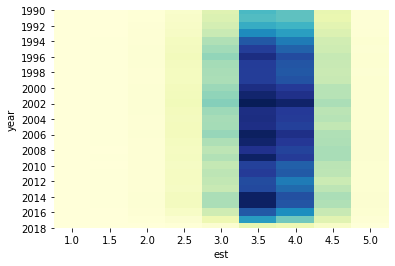

In [59]:
#Check for recommendations on year basis after 1990
user_best_pred_df = pd.crosstab(movies_rec_best.year, movies_rec_best.est)
sns.heatmap( user_best_pred_df.loc['1990':],  cbar=False, cmap="YlGnBu")

Lets analyze the recommendations for user id 1 - 

Here we are just filtering the data for user = 1.This crosstab shows how the rating is spread across in train set and how the results are predicted in the test set.

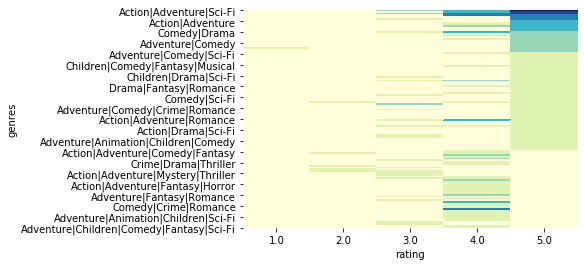

In [60]:
#Analyse recommendations for user id 1
movie_rat_uid_1=movie_rat_df[movie_rat_df.userId==1]
uid_1_actual_by_genre= pd.crosstab( movie_rat_uid_1.genres, movie_rat_uid_1.rating) 

sns.heatmap(uid_1_actual_by_genre.sort_values(5.0, ascending = False), cbar=False, cmap="YlGnBu")

Lets analyze the recommendations for user id 1 and rating is 5. We see that comedy, comedy|romance and Drama are highly predicted.

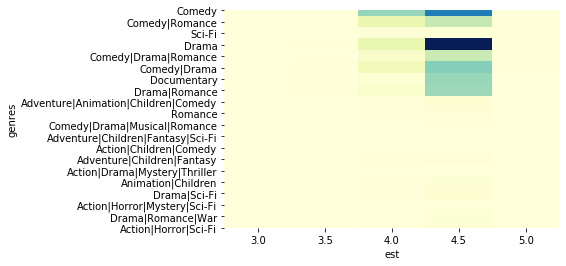

In [61]:
uid_1_best = movies_rec_best[movies_rec_best.uid==1]
uid_1_rat5_best = uid_1_best[uid_1_best.est==5.0]
sns.heatmap(pd.crosstab( uid_1_best.genres, uid_1_best.est).sort_values(5.0, ascending = False).head(20),
            cbar=False, cmap="YlGnBu")

The below is the analysis for movies similar to partiuclar movies. FOr example, we picked "Father of the Bride Part II (1995)" to analyze how the predictions are based on item-item based collaborative filtering.

In [63]:
#Analyse movies similar to a particular movies
movies_df[movies_df['title']=='Father of the Bride Part II (1995)']

,movieId,title,genres,year
4,5,Father of the Bride Part II (1995),Comedy,1995


In [65]:
cur_algo = gs_basic.best_estimator['rmse']
movie_iid = movies_df[movies_df['title']=='Father of the Bride Part II (1995)'].movieId.values[0]
movie_idd_inner_id = cur_algo.trainset.to_inner_iid(movie_iid)
movies_like_movie_inner_ids = cur_algo.get_neighbors(movie_idd_inner_id, 10)
movies_like_movie_raw_ids = [cur_algo.trainset.to_raw_iid(inner_iid ) for inner_iid in movies_like_movie_inner_ids]
movies_df[movies_df['movieId'].isin(movies_like_movie_raw_ids)]

,movieId,title,genres,year
367,423,Blown Away (1994),Action|Thriller,1994
1110,1445,McHale's Navy (1997),Comedy|War,1997
1332,1804,"Newton Boys, The (1998)",Crime|Drama,1998
1788,2387,Very Bad Things (1998),Comedy|Crime,1998
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller,1980
2184,2901,Phantasm (1979),Horror|Sci-Fi,1979
2280,3024,Piranha (1978),Horror|Sci-Fi,1978
2507,3354,Mission to Mars (2000),Sci-Fi,2000
4088,5841,Return to the Blue Lagoon (1991),Adventure|Romance,1991
8509,114060,The Drop (2014),Crime|Drama|Thriller,2014



In comparision, item - item based CF model is better at correctly recommending movies effectively but not as good as correctly predicting the exact rating the user will rate the particular movie.The item-item model is the better model as we value the ability to recommend a movie that the user than trying to predict what the rating is the user will gievn movie.

***
# Modeling and Evaluation 3
*Visualize Results*

**Average Predicted ratings from year 1990**

If we look at how the ratings are created based on the year, we see that the average rating falls between 3-4 and average is around 3.5. It is great way to see how the predictions are for movie rating. We will see at user level predictions later in the lab. For years 1940-1990, we see a lot of recommendation falls around 3 and 4. around 3.5 and 4 are densly calculated. The next plots show heavily on heatmap on how the rating is based on years. 

*For recommendation system, heatmap makes better sense to see how the rating is spread and predicted.*

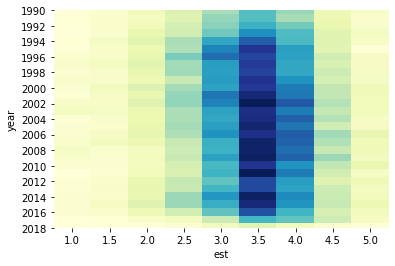

In [33]:
user_pred_df = pd.crosstab(m_df.year, m_df.est)
sns.heatmap( user_pred_df.loc['1990':],  cbar=False, cmap="YlGnBu")

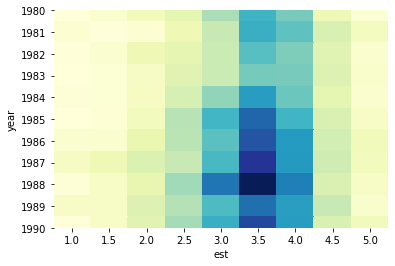

In [34]:
sns.heatmap( user_pred_df.loc['1980':'1990'],  cbar=False, cmap="YlGnBu")

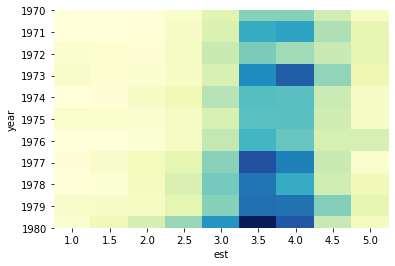

In [35]:
sns.heatmap( user_pred_df.loc['1970':'1980'],  cbar=False, cmap="YlGnBu")


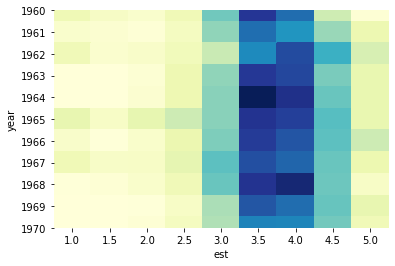

In [36]:
sns.heatmap( user_pred_df.loc['1960':'1970'],  cbar=False, cmap="YlGnBu")


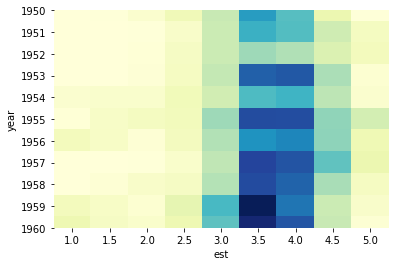

In [37]:
sns.heatmap( user_pred_df.loc['1950':'1960'],  cbar=False, cmap="YlGnBu")


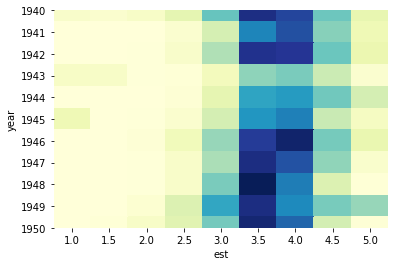

In [38]:
sns.heatmap( user_pred_df.loc['1940':'1950'],  cbar=False, cmap="YlGnBu")


**Analysis of individual user behaviour**

Some of the assumptions we are planning to address is whether sparisity of data has any impact. We will looks at user 1, to see how we see any impact on the prediction.

 *For recommendation system, heatmap makes better sense to see how the rating is spread and predicted.*

In [39]:
movie_rat_uid_1=movie_rat_df[m_df.uid==1]
uid_1_actual_by_genre= pd.crosstab( movie_rat_uid_1.genres, movie_rat_uid_1.rating)

C:\Users\dkunupudi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


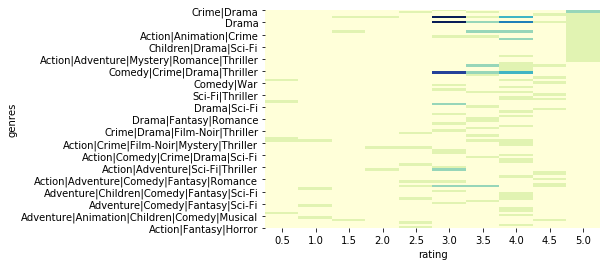

In [40]:
sns.heatmap(uid_1_actual_by_genre.sort_values(5.0, ascending = False), cbar=False, cmap="YlGnBu")

**Movies predicted for user 1 with by genres**

For user 1, the rating is around 4 and 5 and are hihly rated for drama and comedy. We can look at randomly picked user.

 *For recommendation system, heatmap makes better sense to see how the rating is spread and predicted.*

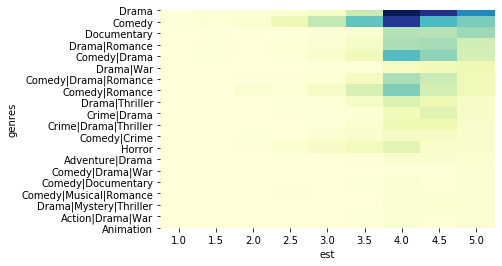

In [41]:
uid_1 = m_df[m_df.uid==1]
uid_1_rat5 = uid_1[uid_1.est==5.0]
sns.heatmap(pd.crosstab( uid_1.genres, uid_1.est).sort_values(5.0, ascending = False).head(20),
            cbar=False, cmap="YlGnBu")

**For User 2**

We see that the ratings are spread across and are around 3 and user 2 has predicted rating better for comedy|romance. The below 2 plots show the evidence on how the rating is based on generes. *For recommendation system, heatmap makes better sense to see how the rating is spread and predicted.*

C:\Users\dkunupudi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


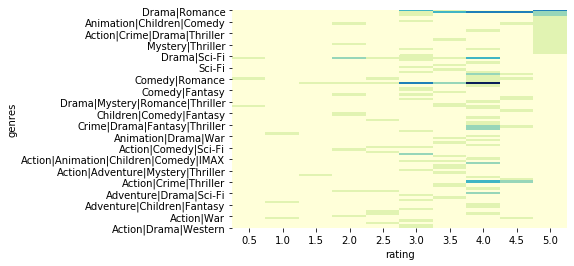

In [42]:
movie_rat_uid_2=movie_rat_df[m_df.uid==2]
sns.heatmap( pd.crosstab( movie_rat_uid_2.genres, movie_rat_uid_2.rating).sort_values(5.0, ascending = False)
            , cbar=False, cmap="YlGnBu")

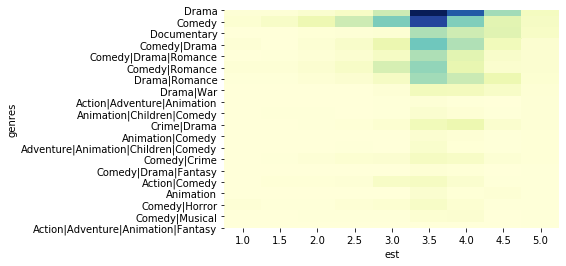

In [43]:
uid_2 = m_df[m_df.uid==2]
sns.heatmap(pd.crosstab( uid_2.genres, uid_2.est).sort_values(5.0, ascending = False).head(20),
            cbar=False, cmap="YlGnBu")

***
# Modeling and Evaluation 4
*Summarize the Ramifications*

The lab is primarily focused on collaborative filtering using Surprise package. As stated in the initial section, we would 
+ Transforming and normalizing data if any
+ Training model
+ Evaluating model performance
+ Selecting the optimal model

For selecting the model, We will measure the effectiveness of the algorithm using RMSE - Root mean squared error. 

All these models were executed and evaluated from surprise package.
* KNNBasic 
* KNNWithMeans
* KNNBaseline

We have used GridSearchCV to identify the correct optimized paramters which provides accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. This was very useful for finding the best set of parameters for a prediction algorithm for all the above models. We see that KNNBasic performed better than KNNWithMeans and KNNBaseline.




In [15]:
from IPython.display import Image
Image(url ='./images/t1.JPG')

The overall RMSE of the final models is approximately 1 (actual value is 0.9622). The meaning of this value is that the recommender system is able to predict the rating of a given movie within approximately 0.96 stars of the actual rating.  The ramification of the resulting RMSE value is that the model predicts the rating of a given movie to within 1 star of the actual rating.With only 5 potential rating options, we do not have an optimum performance. The dataset leveraged is test dataset with 100K records which is less compared to userbase which we have for netflix or amazon. 

KNNBaseline has RMSE of  0.77, KNNWithMeans has around 0.89. Sll the models performed to an extend better. However, we need to consider that both these model comes with additional paramters which could have impacted the accuracy of the model. Apart from RMSE, we should consider other parameters like MAE, precision and recall to look at the identifying the model. For cross-valdiation,  we leveraged K-fold validation and using RMSE to evaluate the models. As mentioned earlier, RMSE is the most commonly used method to evaluate. We will measure per user and per movie rmse to check the quality of the model at detaul level. In addition, We leveraged GridSearchCV function which is used to determine the best performing parameter values using cross validation.

However, The model build is a foundation for the next step. Based on the results, we see that we have achieved the goal at basic level. There are different attributes which can be leveraged to make a more robust model like age, tag, geography and user profile. These as well play a role in making a better recommendation system. Along with we can have NLP integration to extract the sentiment analysis on the verbose review provided by users.

The findings from the project is that we got the best optimum parameters using the gridsearchcv. The RMSE value reduced further for KNNWithMeans and KNNBaseline. Given the dataset, we can test further with large dataset to see how the basic model would perform. Given the compute power and storage capacity of given resources, we couldnt extend further. 

Other Observations:

+ Popular movies staying popular
+ New movies are not recommended
+ Additional data sources and attributes are needed to make it a robust solution

Based on the company requirements, the model can be fine tuned. Our model acts as a foundation for building larger and more robust model with different attributes like age, geography,verbose review apart from rating. It can further be expanded to other areas in a holistic way when integrated with the other application which media-centric companies leverages on day-to-day to improve user experience.

***
# Deployment
*Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*

We have evaluated different models using surprise package - KNNBasic, KNNwithMeans and KNNBaseline. All the models provided different rmse. As mentioned in the first section that we are leveraging RMSE to evaluate the model and each provided different answers it is to predict how a given user will most likely rate specific movies they have not seen before and
What “new” movies a system might recommend to them ?. It is important to answer these questions. 

Based on the results, we see that we have achieved the goal at basic level. There are different attributes which can be leveraged to make a more robust model like age, tag, geography and user profile. These as well play a role in making a better recommendation system. Along with we can have NLP integration to extract the sentiment analysis on the verbose review provided by users.

*How it will be useful:* The dataset is test dataset with 100K records which is less compared to userbase which we have for netflix or amazon. So, is it a throw away model? No, it is a basic foundation for building the larger model using different attributes like age, tag, geography and user profile.Finetune the model to handle larger amounts of data and computing power. Later, based on RMSE and other parameters in evaluation, we can get the best model for predicting rating and providing better user experience. Additionaly, this information can be used by media centric companies and external third parties which leverages the data and having this model integrated with the applications will help deliver better insights in realtime and make robust user-experience. In order for it be delivered in realtime, we need to evaluate the infrastructure and integrate it with the online application where this information can be used. For any additional parameter changed or attributes, the model should be evaluated further. For immediate use, we can run this model integrated and expanded with different data source(s) and can be run on adhoc basis. For real-time use, as mentioned earlier, we need to evaluate the infrastructure and integrate for seamless recommendation.

The usefulness of the model increases if the:

- expanding the solution to  additional information / attributes & data sources
- Improving the storage and computing power to have the model predict in real-time
- Integrating and extracting sentiment analysis using NLP

Deployment:

Our model acts as a foundation for building larger and more robust model with different attributes like age, geography,verbose review apart from rating. It can further be expanded to other areas in a holistic way when integrated with the other application which media-centric companies leverages on day-to-day to improve user experience. Apart from these, the data needs to be updated on regular basis. Along with we can have NLP integration to extract the sentiment analysis on the verbose review provided by users.

Following needs to be constantly monitored:
* RMSE and MAE.
* Data to be added on frequent basis and making it close to real-time.
* Model can be deployed through API, cloud solution or docker package. 
* Customized to Media centric and social media based companies.

The frequency of the model and data should be updated as close to real-time for better insights and user-experience in recommending movies.


***
# Exceptional Work
*You have free reign to provide additional analyses or combine analyses.*

As a part of this lab, we spent more than 100+ hours understanding the dataset and spent time researching the different models. Also,

+ GridsearchCV for all surprise models build and all the parameters for KNNBasic, KNNWithMeans and KNNBaseline are listed above. It is to select the best configuration given prior parameter.


+ Apart from Surprise package, leveraged Graphlab for collaborative filtering to cross the performance in general.

**Collaborative Filtering using GraphLab**

Step 1: For graphlab, we will leverage the following libraries and import the files into convert the datafrome to sframe.

In [26]:
import pandas as pd

import matplotlib.pyplot as plt



movies_df =pd.read_csv('data/ml-latest-small/movies.csv')
ratings_df =pd.read_csv('data/ml-latest-small/ratings.csv')
links_df =pd.read_csv('data/ml-latest-small/links.csv')
tags_df =pd.read_csv('data/ml-latest-small/tags.csv')

#movies_df['year'] =movies_df.title.apply(lambda x: x [-5:-1] if  x[-5].strip() in ['1','2'] else None)
movies_df.head()
movie_rat_df = ratings_df.merge(movies_df)
movie_rat_df.to_csv('data/movie_rat_df.csv')
moviedf = gl.SFrame.read_csv('data/movie_rat_df.csv')

Finished parsing file /Users/dee/data/movie_rat_df.csv

Parsing completed. Parsed 100 lines in 0.093254 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,float,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/dee/data/movie_rat_df.csv

Parsing completed. Parsed 100836 lines in 0.084733 secs.

**User-Based Collaborative Filtering**

Build the recommender using user id, title and rating with k=5. Later, save the model to my_model.

+ The Final training RMSE is around 0.670825

In [27]:
import graphlab as gl
model = gl.recommender.create(moviedf, user_id="userId", item_id="title", target="rating")
results = model.recommend(users=None, k=5)
model.save("my_model")

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 100836 observations with 610 users and 9719 items.

Data prepared in: 0.280833s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 12604 / 100836 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 8.33333           | Not Viable                               |

| 1       | 2.08333           | Not Viable                               |

| 2       | 0.520833          | Not Viable                               |

| 3       | 0.130208          | 0.727325                                 |

| 4       | 0.0651042         | 1.04764                                  |

| 5       | 0.0325521         | 1.36236                                  |

| 6       | 0.016276          | 1.57183                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.130208          | 0.727325                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 106us        | 2.13091           | 1.0425                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 133.191ms    | 2.74611           | 1.39218               | 0.130208    |

| 2       | 281.33ms     | 1.37089           | 0.957199              | 0.130208    |

| 3       | 429.327ms    | 1.40585           | 0.978442              | 0.130208    |

| 4       | 555.994ms    | 1.04647           | 0.860449              | 0.130208    |

| 5       | 693.663ms    | 0.832996          | 0.773046              | 0.130208    |

| 6       | 813.935ms    | 0.721004          | 0.722026              | 0.130208    |

| 10      | 1.31s        | 0.551425          | 0.636152              | 0.130208    |

| 11      | 1.43s        | 0.571987          | 0.644208              | 0.130208    |

| 20      | 2.49s        | 0.495977          | 0.605758              | 0.130208    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.411404

Final training RMSE: 0.548921

**Item-Item Collaborative filtering**

Next step would be to build item-based collabortive filtering using user id and title and rating. We see that it build the similarity table based on title and ranks them accordingly with score. We see that toy story and toy story 2 are similar.

In [21]:
#Item-based recommendation system

ii = gl.recommender.item_similarity_recommender.create(moviedf, 
                                  user_id="userId", 
                                  item_id="title", 
                                  target="rating",
                                  only_top_k=3,
                                  similarity_type="cosine")

results = ii.get_similar_items(k=3)
results.head()

Recsys training: model = item_similarity

Warning: Ignoring columns X1, movieId, timestamp, genres;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 100836 observations with 610 users and 9719 items.

Data prepared in: 0.152494s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.819ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 197.444ms                           | 0                | 8               |

| 511.717ms                           | 100              | 9719            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.521437s

title,similar,score,rank
Toy Story (1995),Toy Story 2 (1999),0.572601258755,1
Toy Story (1995),Jurassic Park (1993),0.565636813641,2
Toy Story (1995),Independence Day (a.k.a.ID4) (1996) ...,0.564261674881,3
Grumpier Old Men (1995),Grumpy Old Men (1993),0.447986781597,1
Grumpier Old Men (1995),Striptease (1996),0.446784436703,2
Grumpier Old Men (1995),"Nutty Professor, The(1996) ...",0.445082426071,3
Heat (1995),"Rock, The (1996)",0.522754788399,1
Heat (1995),Twelve Monkeys (a.k.a. 12Monkeys) (1995) ...,0.510677039623,2
Heat (1995),Léon: The Professional(a.k.a. The Professio ...,0.497140288353,3
Seven (a.k.a. Se7en)(1995) ...,Pulp Fiction (1994),0.697653591633,1


We will split the data into 80:20 train and test with random seed of 11 so that it can be repeatable.



In [25]:
train, test = gl.recommender.util.random_split_by_user(moviedf,
                                                    user_id="userId", item_id="movieId",
                                                    max_num_users=100, item_test_proportion=0.2, random_seed=11)

item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="movieId", 
                                  target="rating",
                                  only_top_k=5,
                                  similarity_type="cosine")

rmse_results_item = item_item.evaluate(test)

Recsys training: model = item_similarity

Warning: Ignoring columns X1, timestamp, title, genres;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 98140 observations with 610 users and 9643 items.

Data prepared in: 0.090598s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 10.965ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 197.387ms                           | 0                | 8               |

| 482.227ms                           | 100              | 9643            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.496957s


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.37      | 0.0330692745624 |
|   2    |     0.325      | 0.0477461355695 |
|   3    | 0.316666666667 | 0.0696090864395 |
|   4    |     0.295      | 0.0833881625019 |
|   5    |     0.288      | 0.0988885198156 |
|   6    | 0.276666666667 |  0.111257983066 |
|   7    | 0.271428571429 |  0.124008760633 |
|   8    |     0.2625     |  0.137253606578 |
|   9    | 0.254444444444 |  0.15187261907  |
|   10   |     0.243      |  0.15679273677  |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.6590569182158466)

Per User RMSE (best)
+--------+-------+---------------+
| userId | count |      rmse     |
+--------+-------+---------------+
|  298   |  184  | 2.50517742323 |
+--------+-------+---------------+
[1 rows x 3 columns]


Per User RMSE (worst)

The best rmse is around 0.49 per item and 2.50 per user. The overall rmse is around *Overall RMSE: ', 3.6590569182158466* which is relatively better.

So, based on the overview of these general comparison between the models, 

In [31]:
cv = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="userId", 
                                  item_id="movieId", 
                                  target="rating",
                                  num_factors=16,                 # override the default value
                                  regularization=1e-02,           # override the default value
                                  linear_regularization = 1e-3)   # override the default value

rmse_results_regularized = cv.evaluate(test)

gl.recommender.util.compare_models(test, [item_item,cv])

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 98140 observations with 610 users and 9643 items.

Data prepared in: 0.192867s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 12267 / 98140 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.075051          | 1.67493                                  |

| 1       | 0.0375255         | 1.65937                                  |

| 2       | 0.0187628         | 1.69702                                  |

| 3       | 0.00938138        | 1.77694                                  |

| 4       | 0.00469069        | 1.88072                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0375255         | 1.65937                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 128us        | 2.12647           | 1.04138               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 115.743ms    | 2.00412           | 0.983766              | 0.0375255   |

| 2       | 235.49ms     | 1.802             | 0.978428              | 0.0375255   |

| 3       | 452.93ms     | 1.73752           | 0.965335              | 0.0375255   |

| 4       | 570.344ms    | 1.72066           | 0.95551               | 0.0375255   |

| 5       | 691.192ms    | 1.71612           | 0.948798              | 0.0375255   |

| 6       | 822.241ms    | 1.71228           | 0.946788              | 0.0375255   |

| 10      | 1.26s        | 1.70612           | 0.93863               | 0.0375255   |

| 11      | 1.36s        | 1.70498           | 0.939329              | 0.0375255   |

| 20      | 2.38s        | 1.69788           | 0.935332              | 0.0375255   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.71277

Final training RMSE: 0.931493


Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    |      0.19      | 0.0146968801579 |
|   2    |      0.19      | 0.0227952695374 |
|   3    | 0.183333333333 |  0.029277306751 |
|   4    |      0.17      | 0.0338437649592 |
|   5    |     0.156      | 0.0358676346404 |
|   6    | 0.151666666667 | 0.0409532353497 |
|   7    | 0.147142857143 | 0.0479703140805 |
|   8    |     0.1425     | 0.0538342941603 |
|   9    | 0.135555555556 | 0.0596285869776 |
|   10   |     0.135      | 0.0639357785248 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.9671620530487242)

Per User RMSE (best)
+--------+-------+----------------+
| userId | count |      rmse      |
+--------+-------+----------------+
|  164   |   3   | 0.464201917717 |
+--------+-------+----------------+
[1 rows x 3 columns]


Per User RMSE (w

[{'precision_recall_by_user': Columns:
  	userId	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 1800
  
  Data:
  +--------+--------+----------------+-----------------+-------+
  | userId | cutoff |   precision    |      recall     | count |
  +--------+--------+----------------+-----------------+-------+
  |   6    |   1    |      1.0       | 0.0151515151515 |   66  |
  |   6    |   2    |      1.0       |  0.030303030303 |   66  |
  |   6    |   3    |      1.0       | 0.0454545454545 |   66  |
  |   6    |   4    |      1.0       | 0.0606060606061 |   66  |
  |   6    |   5    |      1.0       | 0.0757575757576 |   66  |
  |   6    |   6    | 0.833333333333 | 0.0757575757576 |   66  |
  |   6    |   7    | 0.714285714286 | 0.0757575757576 |   66  |
  |   6    |   8    |     0.625      | 0.0757575757576 |   66  |
  |   6    |   9    | 0.555555555556 | 0.0757575757576 |   66  |
  |   6    |   10   |      0.5       | 0.0757575757576 |   66  |
  +--------+-

We are not comparinf the models between surprise package and graphlab. The intenstion is to evalute the package and look at how the RMSE is for user-item and item-item collaborative filtering. Based ont he known measure RMSE, we see that item-item is performing better than user-based.We can look at the other parameters like precision, recall or mae to see how the model is performing. We can get the best performing model by using gridsearch and identify the key attributes needed for best model. More exploration needs to be done.

**References**

https://medium.com/recombee-blog/evaluating-recommender-systems-choosing-the-best-one-for-your-business-c688ab781a35
https://grouplens.org/datasets/movielens/
https://towardsdatascience.com/evaluation-metrics-for-recommender-systems-df56c6611093
https://hodapple.com/blag/posts/2018-04-08-recommender-systems-1.html
https://en.wikipedia.org/wiki/Recommender_system
https://blog.dominodatalab.com/recommender-systems-collaborative-filtering/
https://towardsdatascience.com/evaluating-recommender-systems-root-means-squared-error-or-mean-absolute-error-1744abc2beac
https://link.springer.com/chapter/10.1007/978-3-642-27387-2_25